In [1]:
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# eval_result_folder = os.path.join('Prune_U-Net', 'eval_results_pruned')
# eval_result_folder = os.path.join('Prune_U-Net', 'eval_results')
eval_result_folder = 'eval_results'

In [3]:
location_list = ['Vegas', 'Paris', 'Shanghai', 'Khartoum', 'global_sampled']

In [4]:
fig_folder = 'figs'
os.makedirs(fig_folder, exist_ok=True)

In [5]:
re_model_location = re.compile(r'_\d_(.*)_Train_on')
re_eval_location = re.compile(r'on_mask64_AOI_\d_(.*)_Train.json')

In [6]:
# get eval result files
eval_result_filename_list = os.listdir(eval_result_folder)
eval_result_filename_list = [filename for filename in eval_result_filename_list if 'mask64' in filename]
print(eval_result_filename_list)

['results_mask64_AOI_3_Paris_Train_on_mask64_AOI_4_Shanghai_Train.json', 'results_mask64_AOI_0_global_sampled_Train_on_mask64_AOI_4_Shanghai_Train.json', 'results_mask64_AOI_4_Shanghai_Train_on_mask64_AOI_4_Shanghai_Train.json', 'results_mask64_AOI_2_Vegas_Train_on_mask64_AOI_5_Khartoum_Train.json', 'results_mask64_AOI_4_Shanghai_Train_on_mask64_AOI_5_Khartoum_Train.json', 'results_mask64_AOI_3_Paris_Train_on_mask64_AOI_2_Vegas_Train.json', 'results_mask64_AOI_5_Khartoum_Train_on_mask64_AOI_4_Shanghai_Train.json', 'results_mask64_AOI_2_Vegas_Train_on_mask64_AOI_3_Paris_Train.json', 'results_mask64_AOI_3_Paris_Train_on_mask64_AOI_3_Paris_Train.json', 'results_mask64_AOI_3_Paris_Train_on_mask64_AOI_5_Khartoum_Train.json', 'results_mask64_AOI_2_Vegas_Train_on_mask64_AOI_4_Shanghai_Train.json', 'results_mask64_AOI_4_Shanghai_Train_on_mask64_AOI_2_Vegas_Train.json', 'results_mask64_AOI_5_Khartoum_Train_on_mask64_AOI_2_Vegas_Train.json', 'results_mask64_AOI_5_Khartoum_Train_on_mask64_AOI_5_K

In [7]:
# get model location: {eval_location: accuracy}
eval_result_dict = {}
for eval_result_filename in eval_result_filename_list:
    model_location = re_model_location.search(eval_result_filename).group(1)
    eval_location = re_eval_location.search(eval_result_filename).group(1)
    with open(os.path.join(eval_result_folder, eval_result_filename), 'r') as f:
        eval_result = json.load(f)
    if model_location not in eval_result_dict:
        eval_result_dict[model_location] = {}
    eval_result_dict[model_location][eval_location] = eval_result['val_dice']
print(eval_result_dict)
print(eval_result_dict.keys())

{'Paris': {'Shanghai': 0.36900114590930067, 'Vegas': 0.5841088210327604, 'Paris': 0.6898755872653897, 'Khartoum': 0.3760415736339656}, 'global_sampled': {'Shanghai': 0.6538267290408448, 'Khartoum': 0.6438714056939837, 'Vegas': 0.8039194071187903, 'Paris': 0.6317279694139772}, 'Shanghai': {'Shanghai': 0.6964074485128466, 'Khartoum': 0.47707038922482403, 'Vegas': 0.5531940413911067, 'Paris': 0.34227814612278507}, 'Vegas': {'Khartoum': 0.4425394060171446, 'Paris': 0.3159269288448066, 'Shanghai': 0.3894501173097117, 'Vegas': 0.8327075153130883}, 'Khartoum': {'Shanghai': 0.34619743634536426, 'Vegas': 0.4776439880277864, 'Khartoum': 0.6866250323093616, 'Paris': 0.08043808573188216}}
dict_keys(['Paris', 'global_sampled', 'Shanghai', 'Vegas', 'Khartoum'])


In [8]:
# sort model location and eval location
for model_location in eval_result_dict:
    eval_result_dict[model_location] = {k: v for k, v in sorted(eval_result_dict[model_location].items(), key=lambda item: item[0])}
eval_result_dict = {k: v for k, v in sorted(eval_result_dict.items(), key=lambda item: item[0])}
print(eval_result_dict)
print(eval_result_dict.keys())

{'Khartoum': {'Khartoum': 0.6866250323093616, 'Paris': 0.08043808573188216, 'Shanghai': 0.34619743634536426, 'Vegas': 0.4776439880277864}, 'Paris': {'Khartoum': 0.3760415736339656, 'Paris': 0.6898755872653897, 'Shanghai': 0.36900114590930067, 'Vegas': 0.5841088210327604}, 'Shanghai': {'Khartoum': 0.47707038922482403, 'Paris': 0.34227814612278507, 'Shanghai': 0.6964074485128466, 'Vegas': 0.5531940413911067}, 'Vegas': {'Khartoum': 0.4425394060171446, 'Paris': 0.3159269288448066, 'Shanghai': 0.3894501173097117, 'Vegas': 0.8327075153130883}, 'global_sampled': {'Khartoum': 0.6438714056939837, 'Paris': 0.6317279694139772, 'Shanghai': 0.6538267290408448, 'Vegas': 0.8039194071187903}}
dict_keys(['Khartoum', 'Paris', 'Shanghai', 'Vegas', 'global_sampled'])


In [9]:
plt_config = {
    'Vegas': {'label': 'Las Vegas', 'color': '#90829E', 'marker': 'o'},
    'Paris': {'label': 'Paris', 'color': '#71B6A1', 'marker': 's'},
    'Shanghai': {'label': 'Shanghai', 'color': '#87C5E6', 'marker': '^'},
    'Khartoum': {'label': 'Khartoum', 'color': '#ECA68C', 'marker': 'D'},
    'global_sampled': {'label': 'Global', 'color': '#F2CC8F', 'marker': 'x'},
}
# https://peiseka.com/index-index-peise-id-1357.html
# https://peiseka.com/index-index-peise-id-529.html

[0. 1. 2. 3.]
[0.6866250323093616, 0.08043808573188216, 0.34619743634536426, 0.4776439880277864]
[0.18 1.18 2.18 3.18]
[0.3760415736339656, 0.6898755872653897, 0.36900114590930067, 0.5841088210327604]
[0.36 1.36 2.36 3.36]
[0.47707038922482403, 0.34227814612278507, 0.6964074485128466, 0.5531940413911067]
[0.54 1.54 2.54 3.54]
[0.4425394060171446, 0.3159269288448066, 0.3894501173097117, 0.8327075153130883]
[0.72 1.72 2.72 3.72]
[0.6438714056939837, 0.6317279694139772, 0.6538267290408448, 0.8039194071187903]


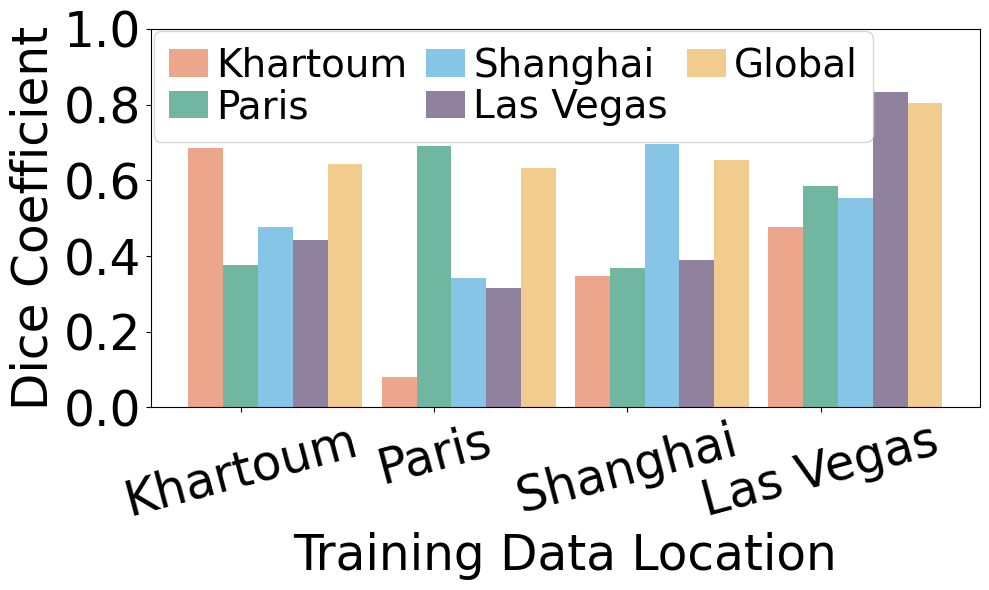

In [10]:
# plot a bar chart
# each model location forms a cluster of bars
# each bar is the accuracy for the eval location

font_size = 35

fig = plt.figure(figsize=(10, 6))

bar_width = 0.18
bar_gap = 0.0
bar_positions = np.arange(len(location_list) - 1)
model_location_list = list(eval_result_dict.keys())
bar_location_list = [location for location in location_list if 'global' not in location]
bar_location_list.sort()
bar_location_label_list = [plt_config[location]['label'] for location in bar_location_list]

for i, model_location in enumerate(model_location_list):
    eval_result = eval_result_dict[model_location]
    bar_position = bar_positions + i * (bar_width + bar_gap)
    # bar_values = [eval_result[location] for location in eval_result_dict.keys() if 'global' not in location]
    bar_values = [eval_result[location] for location in bar_location_list]
    print(bar_position)
    print(bar_values)
    plt.bar(bar_position, bar_values, bar_width, label=plt_config[model_location]['label'], color=plt_config[model_location]['color'])

plt.xticks(bar_positions + bar_width, bar_location_label_list, fontsize=font_size, rotation=15)
plt.xlabel('Training Data Location', fontsize=font_size)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=font_size)
plt.ylabel('Dice Coefficient', fontsize=font_size)
plt.legend(fontsize=font_size*0.8, ncol=3, handletextpad=0.2, columnspacing=0.5, bbox_to_anchor=(-0.02, 0.65), loc='lower left', handlelength=1.0, labelspacing=0.1)

plt.tight_layout()
# plt.savefig(os.path.join(fig_folder, 'unet_pruned_location_dice.pdf'))
plt.savefig(os.path.join(fig_folder, 'fig2a_unet_location_dice.pdf'))
plt.savefig(os.path.join(fig_folder, 'fig2a_unet_location_dice.png'))